In [268]:
import models
import torch as th
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


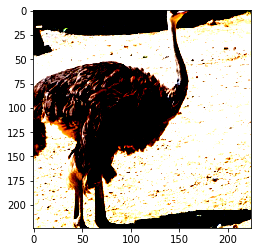

In [213]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline
filename = './resnet/test_images/ostrich.jpg'
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

x = input_batch
plt.imshow(x[0].permute(1,2,0));

In [214]:
# SEED = 0
# th.manual_seed(SEED)

# CUDA_ID = 3
# device = th.device('cpu')
# dn = models.DamNet(3, pretrained=True, debug=True).to(device)
# x = x.to(device)
# dn.eval();

In [290]:
SEED = 0
th.manual_seed(SEED)

CUDA_ID = 3
# device = th.device('gpu')
device = th.device(CUDA_ID)
do_da = True
return_z = False
debug = False
wholenet = models.WholeNet(num_domains=2, z_features=256, do_da=do_da, return_z=return_z, debug=debug).to(device)
x = x.to(device)
wholenet.eval();

[autoreload of models failed: Traceback (most recent call last):
  File "/home/davydov/miniconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/davydov/miniconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/home/davydov/miniconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/davydov/miniconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/home/davydov/miniconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/davydov/miniconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): 

In [291]:
# x.requires_grad_(True)
out = wholenet(x, 0)
# with th.no_grad():
#     out = wholenet(x, 0)
p, d, z = out

In [271]:
print(p)
print(d)
print(z)

tensor([[[ 0.0731,  0.0188],
         [ 0.0017,  0.0171],
         [ 0.0854,  0.0493],
         [ 0.0786,  0.0266],
         [-0.0915, -0.0289],
         [ 0.0147, -0.0691],
         [-0.0971,  0.0523],
         [-0.0328,  0.2363],
         [-0.0095,  0.1589],
         [ 0.0730,  0.0518],
         [-0.0221, -0.0333],
         [-0.0393, -0.1706],
         [-0.1364, -0.0090],
         [-0.2098,  0.0706],
         [ 0.0420, -0.0420]]])
None
None


In [267]:
output = th.nn.functional.softmax(z[0], dim=0)
for i in range(10):
    max_ind = th.argmax(output)
    print('{}: {}'.format(i,max_ind))
    output[max_ind] = 0
print('\n')

0: 9
1: 138
2: 355
3: 354
4: 100
5: 134
6: 276
7: 23
8: 353
9: 127




In [21]:
for name, data in wholenet.named_parameters():
    print(name, data.shape)

fe.units.layer0.0.0.weight torch.Size([64, 3, 7, 7])
fe.units.layer0.0.1.weight torch.Size([64])
fe.units.layer0.0.1.bias torch.Size([64])
fe.units.layer0.1.0.weight torch.Size([64, 3, 7, 7])
fe.units.layer0.1.1.weight torch.Size([64])
fe.units.layer0.1.1.bias torch.Size([64])
fe.units.layer0.2.0.weight torch.Size([64, 3, 7, 7])
fe.units.layer0.2.1.weight torch.Size([64])
fe.units.layer0.2.1.bias torch.Size([64])
fe.units.layer0.3.0.weight torch.Size([64, 3, 7, 7])
fe.units.layer0.3.1.weight torch.Size([64])
fe.units.layer0.3.1.bias torch.Size([64])
fe.units.layer0.4.0.weight torch.Size([64, 3, 7, 7])
fe.units.layer0.4.1.weight torch.Size([64])
fe.units.layer0.4.1.bias torch.Size([64])
fe.units.layer0.5.0.weight torch.Size([64, 3, 7, 7])
fe.units.layer0.5.1.weight torch.Size([64])
fe.units.layer0.5.1.bias torch.Size([64])
fe.units.layer0.6.0.weight torch.Size([64, 3, 7, 7])
fe.units.layer0.6.1.weight torch.Size([64])
fe.units.layer0.6.1.bias torch.Size([64])
fe.units.layer0.7.0.weight 

fe.gates_ws.domain_7_layer2 torch.Size([10, 1, 1, 1, 1])
fe.gates_ws.domain_7_layer3 torch.Size([10, 1, 1, 1, 1])
fe.gates_ws.domain_7_layer4 torch.Size([10, 1, 1, 1, 1])
fe.gates_ws.domain_7_avgpool torch.Size([10, 1, 1, 1, 1])
fe.gates_ws.domain_7_fc torch.Size([10, 1, 1, 1, 1])
fe.gates_ws.domain_8_layer0 torch.Size([10, 1, 1, 1, 1])
fe.gates_ws.domain_8_layer1 torch.Size([10, 1, 1, 1, 1])
fe.gates_ws.domain_8_layer2 torch.Size([10, 1, 1, 1, 1])
fe.gates_ws.domain_8_layer3 torch.Size([10, 1, 1, 1, 1])
fe.gates_ws.domain_8_layer4 torch.Size([10, 1, 1, 1, 1])
fe.gates_ws.domain_8_avgpool torch.Size([10, 1, 1, 1, 1])
fe.gates_ws.domain_8_fc torch.Size([10, 1, 1, 1, 1])
fe.gates_ws.domain_9_layer0 torch.Size([10, 1, 1, 1, 1])
fe.gates_ws.domain_9_layer1 torch.Size([10, 1, 1, 1, 1])
fe.gates_ws.domain_9_layer2 torch.Size([10, 1, 1, 1, 1])
fe.gates_ws.domain_9_layer3 torch.Size([10, 1, 1, 1, 1])
fe.gates_ws.domain_9_layer4 torch.Size([10, 1, 1, 1, 1])
fe.gates_ws.domain_9_avgpool torch.Si